In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
rng = np.random.default_rng(seed=42)
m = 200 
X = 2*rng.random((m,1)) 
y = 4 + 3*X + rng.standard_normal((m,1))
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (200, 1)
y shape: (200, 1)


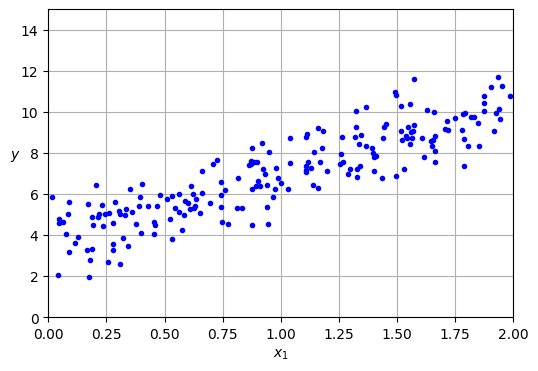

In [4]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.grid()
plt.axis([0,2,0,15])
plt.show()

### Normal Equation
$\hat{\theta} = (X^{\top} X)^{-1} X^{\top} y$



We can directly compute the model parameters with the normal eqn

In [7]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
print("X_b shape:",X_b.shape)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

X_b shape: (200, 2)
[[3.69084138]
 [3.32960458]]


In [9]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
print(X_new_b.shape)
y_predict = X_new_b @ theta_best
y_predict

(2, 2)


array([[ 3.69084138],
       [10.35005055]])

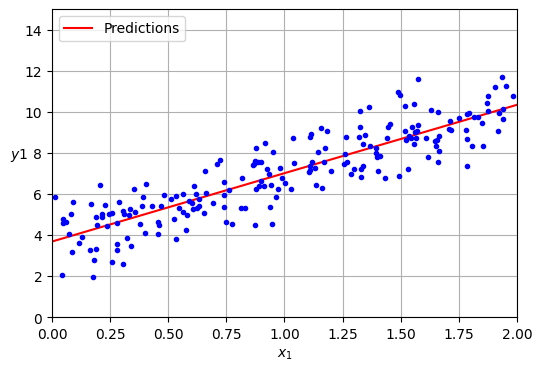

In [11]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y1$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_,lin_reg.intercept_

(array([[3.32960458]]), array([3.69084138]))

### Gradient Descent
### Batch Gradient Descent

In [14]:
eta = 0.1 
n_epochs = 1000
m = len(X_b)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2,1)) # random initialization

for epoch in range(n_epochs):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta -= eta*gradients

print(gradients) 
print(theta)


[[ 5.78009862e-15]
 [-6.21638158e-15]]
[[3.69084138]
 [3.32960458]]
